In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Useful definitions
M = 0.938272081 # target mass
me = 0.5109989461 * 0.001 # electron mass
ebeam = 10.604 # beam energy
pbeam = np.sqrt(ebeam * ebeam - me * me) # beam electron momentum
beam = [0, 0, pbeam] # beam vector
target = [0, 0, 0] # target vector
import numpy as np

def dot(vec1, vec2):
    # dot product of two 3d vectors
    return vec1[0]*vec2[0]+vec1[1]*vec2[1]+vec1[2]*vec2[2]

def mag(vec1):
    # L2 norm of vector
    return np.sqrt(dot(vec1, vec1))

def mag2(vec1):
    # square of L2 norm
    return  dot(vec1, vec1)

def cosTheta(vec1, vec2):
    # cosine angle between two 3d vectors
    return dot(vec1,vec2)/np.sqrt(mag2(vec1) * mag2(vec2))

def angle(vec1, vec2):
    # angle between two 3d vectors
    return 180/np.pi*np.arccos(np.minimum(1, cosTheta(vec1, vec2)))

def cross(vec1, vec2):
    # cross product of two 3d vectors
    return [vec1[1]*vec2[2]-vec1[2]*vec2[1], vec1[2]*vec2[0]-vec1[0]*vec2[2], vec1[0]*vec2[1]-vec1[1]*vec2[0]]

def vecAdd(gam1, gam2):
    # add two 3d vectors
    return [gam1[0]+gam2[0], gam1[1]+gam2[1], gam1[2]+gam2[2]]

def pi0Energy(gam1, gam2):
    # reconstructed pi0 energy of two 3d photon momenta
    return mag(gam1)+mag(gam2)

def pi0InvMass(gam1, gam2):
    # pi0 invariant mass of two 3d photon momenta
    pi0mass2 = pi0Energy(gam1, gam2)**2-mag2(vecAdd(gam1, gam2))
    pi0mass2 = np.where(pi0mass2 >= 0, pi0mass2, 10**6)
    pi0mass = np.sqrt(pi0mass2)
    pi0mass = np.where(pi0mass > 100, -1000, pi0mass)
    return pi0mass

def getPhi(vec1):
    # azimuthal angle of one 3d vector
    return 180/np.pi*np.arctan2(vec1[1], vec1[0])

def getTheta(vec1):
    # polar angle of one 3d vector
    return 180/np.pi*np.arctan2(np.sqrt(vec1[0]*vec1[0]+vec1[1]*vec1[1]), vec1[2])

def getEnergy(vec1, mass):
    # for taken 3d momenta p and mass m, return energy = sqrt(p**2 + m**2)
    return np.sqrt(mag2(vec1)+mass**2)

def readFile(fname):
    #read root using uproot
    ffile = uproot.open(fname)
    tree = ffile["T"]
    return tree

In [27]:
def plot_2dhist(x_data,y_data,var_names,ranges,colorbar=True,
            saveplot=False,pics_dir="none",plot_title="none",logger=False,first_label="rad",
            filename="ExamplePlot",units=["",""],extra_data=None):
    
    
    plt.rcParams["font.size"] = "15"

    plt.rcParams["font.family"] = "Times New Roman"
    
    # Initalize parameters
    x_name = var_names[0]
    y_name = var_names[1]
    xmin = ranges[0][0]
    xmax =  ranges[0][1]
    num_xbins = ranges[0][2]
    ymin = ranges[1][0]
    ymax =  ranges[1][1]
    num_ybins = ranges[1][2]
    x_bins = np.linspace(xmin, xmax, num_xbins) 
    y_bins = np.linspace(ymin, ymax, num_ybins) 

    # Creating plot
    fig, ax = plt.subplots(figsize =(6, 3)) 
    if units[0] == "None":
        ax.set_xlabel("{}".format(x_name))
    else:
        ax.set_xlabel("{} ({})".format(x_name,units[0]))
    if units[1] == "None":
        ax.set_ylabel("{}".format(y_name))
    else:
        ax.set_ylabel("{} ({})".format(y_name,units[1]))

    plt.hist2d(x_data, y_data, bins =[x_bins, y_bins],
        range=[[xmin,xmax],[ymin,ymax]],norm=mpl.colors.LogNorm())# cmap = plt.cm.nipy_spectral) 

    plt.axhline(y=0, color='r', linestyle='-')
    
    # Adding color bar 
    if colorbar:
        plt.colorbar()
        
    plt.title(plot_title)

In [30]:
df_out = pd.read_pickle("/mnt/d/GLOBUS/CLAS12/APS2022/pickled_dvpip/norad_2133_20220222_1935_Fall_2018_Outbending_100_recon_dvpip_rec.pkl")
#df_out = pd.read_pickle("/mnt/d/GLOBUS/CLAS12/APS2022/pickled_data/norad_2133_20220222_1935_Fall_2018_Outbending_100_recon.pkl")

In [5]:
print(df_out.head())

        Epx       Epy       Epz     Eedep  Esector  event        Ep  \
0  1.239328  0.069678  7.690175  2.022404        1      0  7.789709   
1 -1.034306 -0.216834  7.978287  2.001633        4      1  8.047973   
2 -0.462248  0.545717  5.845906  1.474996        3      2  5.889491   
3 -0.462248  0.545717  5.845906  1.474996        3      2  5.889491   
4 -0.462248  0.545717  5.845906  1.474996        3      2  5.889491   

   ESamplFrac       Ppx       Ppy  ...    GenGpz     GenGp    GenGp2  \
0    0.259625 -0.422213 -0.193683  ...  2.400763  2.536663  0.093069   
1    0.248713  0.396602  0.668438  ...  1.123472  1.207916  0.927187   
2    0.250445 -0.170807  0.455323  ...  4.212080  4.367590  0.136315   
3    0.250445 -0.170807  0.455323  ...  4.212080  4.367590  0.136315   
4    0.250445 -0.170807  0.455323  ...  4.212080  4.367590  0.136315   

    GenGpx2   GenGpy2   GenGpz2  GenGtheta     GenGphi  GenGtheta2    GenGphi2  
0 -0.016784  0.025459  0.087932  18.839708  173.912838   19

In [31]:
df_in = pd.read_pickle("/mnt/d/GLOBUS/CLAS12/APS2022/pickled_dvpip/2133_20220119_1104_Fall_2018_Inbendingnorad_rec_dvpip_rec.pkl")
#df_in = pd.read_pickle("/mnt/d/GLOBUS/CLAS12/APS2022/pickled_data/2133_20220119_1104_Fall_2018_Inbendingnorad_rec.pkl")

In [7]:
for col in df_out.columns:
    print(col)

Epx
Epy
Epz
Eedep
Esector
event
Ep
ESamplFrac
Ppx
Ppy
Ppz
Pstat
Psector
Pp
Ptheta
Pphi
Pband
Pe
PFid
Gpx
Gpy
Gpz
Gedep
Gsector
GFid
Gp
Gtheta
Gphi
GSamplFrac
Gpx2
Gpy2
Gpz2
Gedep2
Gsector2
GFid2
Gp2
Gtheta2
Gphi2
GSamplFrac2
Ee
Etheta
Ephi
Ge
Ge2
Mpx
Mpy
Mpz
Q2
nu
xB
y
t1
t2
W
MPt
phi1
phi2
MM2_ep
MM2_egg
MM2_epgg
ME_epgg
Mpi0
reconPi
Pie
coplanarity
coneAngle1
coneAngle2
openingAngle
closeness
GenEpx
GenEpy
GenEpz
GenEp
GenEtheta
GenEphi
GenPpx
GenPpy
GenPpz
GenPp
GenPtheta
GenPphi
GenGpx
GenGpy
GenGpz
GenGp
GenGp2
GenGpx2
GenGpy2
GenGpz2
GenGtheta
GenGphi
GenGtheta2
GenGphi2


In [8]:
df_z = df_out

ele = [df_z['GenEpx'], df_z['GenEpy'], df_z['GenEpz']]
pro = [df_z['GenPpx'], df_z['GenPpy'], df_z['GenPpz']]

gam = [df_z['GenGpx'], df_z['GenGpy'], df_z['GenGpz']]
gam2 = [df_z['GenGpx2'], df_z['GenGpy2'], df_z['GenGpz2']]



df_z.loc[:, 'GenEp'] = mag(ele)
df_z.loc[:, 'GenEe'] = getEnergy(ele, me)
df_z.loc[:, 'GenEtheta'] = getTheta(ele)
df_z.loc[:, 'GenEphi'] = getPhi(ele)

df_z.loc[:, 'GenPp'] = mag(pro)
df_z.loc[:, 'GenPe'] = getEnergy(pro, M)
df_z.loc[:, 'GenPtheta'] = getTheta(pro)
df_z.loc[:, 'GenPphi'] = getPhi(pro)


df_z.loc[:, 'GenGp'] = mag(gam)
df_z.loc[:, 'GenGe'] = getEnergy(gam, 0)
df_z.loc[:, 'GenGtheta'] = getTheta(gam)
df_z.loc[:, 'GenGphi'] = getPhi(gam)

df_z.loc[:, 'GenGp2'] = mag(gam2)
df_z.loc[:,'GenGe2'] = getEnergy(gam2, 0)
df_z.loc[:, 'GenGtheta2'] = getTheta(gam2)
df_z.loc[:, 'GenGphi2'] = getPhi(gam2)

pi0 = vecAdd(gam, gam2)

Ppt = mag([df_z['GenPpx'], df_z['GenPpy'], 0])
VGS = [-df_z['GenEpx'], -df_z['GenEpy'], pbeam - df_z['GenEpz']]
v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
VmissG = [-df_z["GenEpx"] - df_z["GenPpx"], -df_z["GenEpy"] - df_z["GenPpy"],
            pbeam - df_z["GenEpz"] - df_z["GenPpz"]]
VmissP = [-(df_z["GenEpx"] + df_z["GenGpx"]), -(df_z["GenEpy"] + df_z["GenGpy"]),
            -(-pbeam + df_z["GenEpz"] + df_z["GenGpz"])]
Vmiss = [-(df_z["GenEpx"] + df_z["GenPpx"] + df_z["GenGpx"]), -(df_z["GenEpy"] + df_z["GenPpy"] + df_z["GenGpy"]),
            -(-pbeam + df_z["GenEpz"] + df_z["GenPpz"] + df_z["GenGpz"])]
costheta = cosTheta(VGS, gam)



df_z.loc[:, 'GenMpx'], df_z.loc[:, 'GenMpy'], df_z.loc[:, 'GenMpz'] = Vmiss
# binning kinematics
df_z.loc[:,'GenQ2'] = -((ebeam - df_z['GenEe'])**2 - mag2(VGS))
df_z.loc[:,'Gennu'] = (ebeam - df_z['GenEe'])
df_z.loc[:,'Geny'] = df_z['Gennu']/ebeam
df_z.loc[:,'GenxB'] = df_z['GenQ2'] / 2.0 / M / df_z['Gennu']
df_z.loc[:,'Gent1'] = 2 * M * (df_z['GenPe'] - M)
df_z.loc[:,'Gent2'] = (M * df_z['GenQ2'] + 2 * M * df_z['Gennu'] * (df_z['Gennu'] - np.sqrt(df_z['Gennu'] * df_z['Gennu'] + df_z['GenQ2']) * costheta))\
/ (M + df_z['Gennu'] - np.sqrt(df_z['Gennu'] * df_z['Gennu'] + df_z['GenQ2']) * costheta)
df_z.loc[:,'GenW'] = np.sqrt(np.maximum(0, (ebeam + M - df_z['GenEe'])**2 - mag2(VGS)))
# trento angles
df_z.loc[:,'Genphi1'] = angle(v3l, v3h)
df_z.loc[:,'Genphi1'] = np.where(dot(v3l, pro) > 0, 360.0 -
                            df_z['Genphi1'], df_z['Genphi1'])
df_z.loc[:,'Genphi2'] = angle(v3l, v3g)
df_z.loc[:,'Genphi2'] = np.where(dot(v3l, gam) <
                            0, 360.0 - df_z['Genphi2'], df_z['Genphi2'])
# exclusivity variables
df_z.loc[:,'GenMM2_epg'] = (-M - ebeam + df_z["GenEe"] +
                        df_z["GenPe"] + df_z["GenGe"])**2 - mag2(Vmiss)
df_z.loc[:,'GenME_epg'] = (M + ebeam - df_z["GenEe"] - df_z["GenPe"] - df_z["GenGe"])
df_z.loc[:,'GenMM2_ep'] = (-M - ebeam + df_z["GenEe"] + df_z["GenPe"])**2 - mag2(VmissG)
df_z.loc[:,'GenMM2_eg'] = (-M - ebeam + df_z["GenEe"] + df_z["GenGe"])**2 - mag2(VmissP)
df_z.loc[:,'GenMPt'] = np.sqrt((df_z["GenEpx"] + df_z["GenPpx"] + df_z["GenGpx"])**2 +
                        (df_z["GenEpy"] + df_z["GenPpy"] + df_z["GenGpy"])**2)
df_z.loc[:,'GenconeAngle'] = angle(ele, gam)
df_z.loc[:,'GenreconGam'] = angle(gam, VmissG)
df_z.loc[:,'Gencoplanarity'] = angle(v3h, v3g)

df_out_new = df_z

True
True
True
True


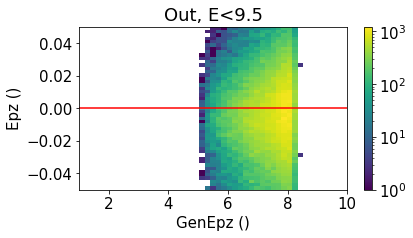

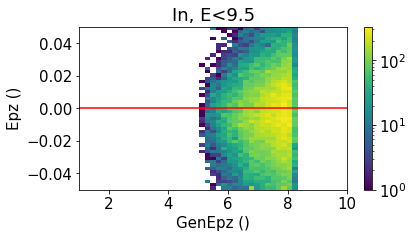

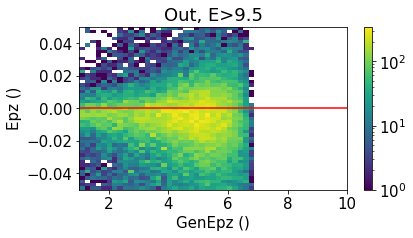

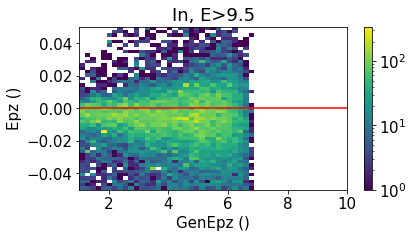

In [29]:
import matplotlib as mpl

angle_cut = 9.5
query_low = "Etheta < {} and Q2 < 2 and Q2 > 1.5".format(angle_cut)
query_hi = "Etheta > {} and Q2 < 2 and Q2 > 1.5".format(angle_cut)

x_var = "GenEtheta"
y_var = "Etheta"
x_var_range = [1,20,50]
y_var_range = [-.1,.1,50]
diffs = True

x_var = "GenEpz"
y_var = "Epz"
x_var_range = [1,10,50]
y_var_range = [-.05,.05,50]
diffs = True


"""
x_var = "GenEphi"
y_var = "GenEtheta"
x_var_range = [-180,180,50]
y_var_range = [5,10,50]
diffs = False


y_var = "Gtheta"
x_var = "Gphi"
x_var_range = [-180,180,50]
y_var_range = [5,30,50]
diffs = False


y_var = "Ptheta"
x_var = "Pphi"
x_var_range = [-180,180,50]
y_var_range = [18,65,50]
diffs = False



y_var = "GenEe"
x_var = "Ee"
x_var_range = [4,8,50]
y_var_range = [-.1,.1,50]
diffs = True


x_var = "Ee"
y_var = "Etheta"
y_var_range = [5,10,50]
x_var_range = [1,10,50]
diffs = False


x_var = "GenEtheta"
y_var = "GenQ2"
y_var_range = [1.5,2,50]
x_var_range = [5,20,50]
diffs = False


x_var = "xB"
y_var = "Q2"
y_var_range = [1.4,2.1,50]
x_var_range = [0.25,0.3,50]
diffs = False

x_var = "phi1"
y_var = "t1"
y_var_range = [0.25,0.45,50]
x_var_range = [0,360,50]
diffs = False

x_var = "GenxB"
y_var = "xB"
x_var_range = [0,1,50]
y_var_range = [-.03,.03,50]
diffs = True


x_var = "GenQ2"
y_var = "Q2"
x_var_range = [1,2,50]
y_var_range = [-.05,.05,50]
"""



df_out_lowE = df_out_new.query(query_low)
df_in_lowE = df_in.query(query_low)
df_out_hiE = df_out_new.query(query_hi)
df_in_hiE = df_in.query(query_hi)

titles = ["Out, E<{}".format(angle_cut),"In, E<{}".format(angle_cut),"Out, E>{}".format(angle_cut),"In, E>{}".format(angle_cut),]
for dfs,title in zip([df_out_lowE,df_in_lowE,df_out_hiE,df_in_hiE],titles):
    print(diffs)
    if diffs:
        y_data = dfs[y_var]-dfs[x_var]
    else:
        y_data = dfs[y_var]
        
    x_data = dfs[x_var]
    var_names = [x_var,y_var]
    ranges = [x_var_range,y_var_range]

    plot_2dhist(x_data,y_data,var_names,ranges,colorbar=True,
                saveplot=False,pics_dir="none",plot_title=title,logger=False,first_label="rad",
                filename="ExamplePlot",units=["",""],extra_data=None)

1.7159365514348597
1.7631942464127737
1.5761949743416797
1.5879864058130895
1.7514609650945538
1.7833571356976339
0.15535505801113722
0.1482550372601635
0.1821236426870969
0.18249938010504735
0.1485500806028799
0.14431420395583802
False
False
False
False


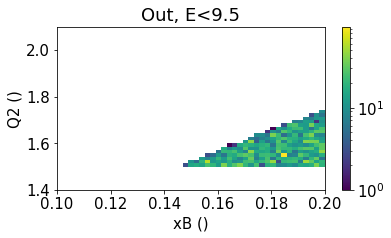

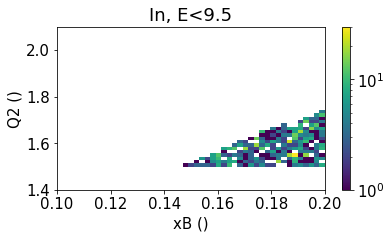

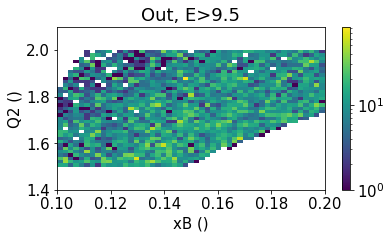

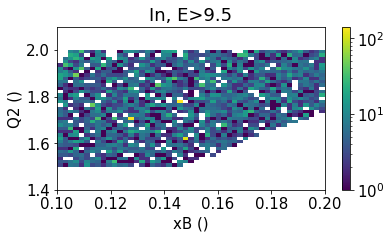

In [10]:
import matplotlib as mpl

angle_cut = 9.5
#query_low = "Etheta < {} and Q2 < 2 and Q2 > 1.5 and t1>0.3 and t1<0.4 and phi1>50 and phi1<150".format(angle_cut)
#query_hi = "Etheta > {} and Q2 < 2 and Q2 > 1.5 and t1>0.3 and t1<0.4 and phi1>50 and phi1<150".format(angle_cut)
#query_low = "Etheta < {} and Q2 < 2 and Q2 > 1.5 and  phi1>50 and phi1<150".format(angle_cut)
#query_hi = "Etheta > {} and Q2 < 2 and Q2 > 1.5 and phi1>50 and phi1<150".format(angle_cut)
#query_low = "Etheta < {} and Q2 < 2 and Q2 > 1.5 and t1>0.3 and t1<0.4 and xB<0.3 and xB>0.25 and phi1>90 and phi1<108".format(angle_cut)
#query_hi = "Etheta > {} and Q2 < 2 and Q2 > 1.5 and t1>0.3 and t1<0.4 and xB<0.3 and xB>0.25 and phi1>90 and phi1<108".format(angle_cut)
#query_bin = "Q2 < 2 and Q2 > 1.5 and t1>0.3 and t1<0.4 and xB<0.3 and xB>0.25 and phi1>90 and phi1<108"
query_low = "Etheta < {} and Q2 < 2 and Q2 > 1.5 and t1>1 and t1<1.5 and xB<0.2 and xB>0.1".format(angle_cut)
query_hi = "Etheta > {} and Q2 < 2 and Q2 > 1.5 and t1>1 and t1<1.5 and xB<0.2 and xB>0.1".format(angle_cut)
query_bin = "Q2 < 2 and Q2 > 1.5 and t1>1 and t1<1.5 and xB<.2 and xB>.1"

#x_var = "GenEtheta"
#y_var = "Etheta"
#x_var_range = [1,20,50]
#y_var_range = [-.1,.1,50]

x_var = "GenEphi"
y_var = "GenEtheta"
x_var_range = [-180,180,50]
y_var_range = [5,10,50]
diffs = False

y_var = "Gtheta"
x_var = "Gphi"
x_var_range = [-180,180,50]
y_var_range = [5,30,50]
diffs = False

y_var = "Ptheta"
x_var = "Pphi"
x_var_range = [-180,180,50]
y_var_range = [18,65,50]
diffs = False


y_var = "GenEe"
x_var = "Ee"
x_var_range = [4,8,50]
y_var_range = [-.1,.1,50]
diffs = True


x_var = "Ee"
y_var = "Etheta"
y_var_range = [5,10,50]
x_var_range = [1,10,50]
diffs = False


#x_var = "GenEtheta"
#y_var = "GenQ2"
#y_var_range = [1.4,2.1,50]
#x_var_range = [5,10,50]
#diffs = False

#x_var = "GenQ2"
#y_var = "Q2"
#x_var_range = [1.4,2.1,50]
#y_var_range = [-0.1,0.1,50]
#diffs = True

x_var = "xB"
y_var = "Q2"
y_var_range = [1.4,2.1,50]
x_var_range = [0.1,0.2,50]
diffs = False

#x_var = "phi1"
#y_var = "t1"
#y_var_range = [0.25,0.45,50]
#x_var_range = [0,360,50]
#diffs = False

#x_var = "GenxB"
#y_var = "xB"
#x_var_range = [0,1,50]
#y_var_range = [-.03,.03,50]
#diffs = True


#x_var = "GenQ2"
#y_var = "Q2"
#x_var_range = [1,2,50]
#y_var_range = [-.05,.05,50]




df_out_lowE = df_out_new.query(query_low)
df_in_lowE = df_in.query(query_low)
df_out_hiE = df_out_new.query(query_hi)
df_in_hiE = df_in.query(query_hi)


print(df_out_new.query(query_bin)["Q2"].mean())
print(df_in.query(query_bin)["Q2"].mean())
print(df_out_lowE["Q2"].mean())
print(df_in_lowE["Q2"].mean())
print(df_out_hiE["Q2"].mean())
print(df_in_hiE["Q2"].mean())


print(df_out_new.query(query_bin)["xB"].mean())
print(df_in.query(query_bin)["xB"].mean())
print(df_out_lowE["xB"].mean())
print(df_in_lowE["xB"].mean())
print(df_out_hiE["xB"].mean())
print(df_in_hiE["xB"].mean())


titles = ["Out, E<{}".format(angle_cut),"In, E<{}".format(angle_cut),"Out, E>{}".format(angle_cut),"In, E>{}".format(angle_cut),]
for dfs,title in zip([df_out_lowE,df_in_lowE,df_out_hiE,df_in_hiE],titles):
    print(diffs)
    if diffs:
        y_data = dfs[y_var]-dfs[x_var]
    else:
        y_data = dfs[y_var]
        
    x_data = dfs[x_var]
    var_names = [x_var,y_var]
    ranges = [x_var_range,y_var_range]

    plot_2dhist(x_data,y_data,var_names,ranges,colorbar=True,
                saveplot=False,pics_dir="none",plot_title=title,logger=False,first_label="rad",
                filename="ExamplePlot",units=["",""],extra_data=None)